# STAT 345 Prelim Exam Two -- Practice Exam

## Name:

You have 48 hours to do this exam, but it should only take $\lesssim$2 hours. You may use any books or notes you like, and any electronic devices with communication capabilities
switched off (airplane mode).  You should not communicate with anyone or look anything up on the internet from the time you start the exam to the time you submit it.

Some problems contain boxes ($\boxed{\color{brown}{????}}$) into which you should place your final
answer. Express all numerical results to at least three decimal places.

The exam contains three problems worth a total of 46 points. Try not to
spend too much time on any one problem. The weight of each part of each
problem is listed, as is the total weight for each problem. Later parts
of a problem may or may not depend on some, but not all, of the previous
parts.

**Show your work!**

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

# 1. Testing for Differences in Variance (19 points total)

**(a)** \[5pts\]
Suppose we have independent data samples

In [5]:
x_i = np.array([10.699, 16.362, 10.343, 13.743, 13.646, 19.019, 13.937, 17.109, 12.232, 28.247,
                16.001, 15.377, 15.372, 23.026, 13.903])
y_j = np.array([0.938, 22.841, 28.907, 18.263, 15.732, 18.828, 18.757, 22.844, 79.969, 13.410])

and we wish to perform a rank-based test to see whether they come from distributions with different variances.  Define, construct, and evaluate the relevant statistic.

In [7]:
n = len(x_i); m = len(y_j); N = n+m; xbar = np.mean(x_i); ybar = np.mean(y_j);
U_i = np.abs(x_i - xbar); V_j = np.abs(y_j - ybar)

In [9]:
UV_r = np.concatenate((U_i,V_j)); R_r = stats.rankdata(UV_r)

In [11]:
RU_i = R_r[:n]; RV_j = R_r[n:]; np.sum(RU_i**2)

2243.0

$$\hbox{Definition of statistic:} \boxed{\color{brown}{\sum_{i=1}^{n} \bigl(R(U_i)\bigr)^2}}$$

$$\hbox{Statistic Value:} \boxed{\color{brown}{2243.0}}$$

**(b)** \[3pts\]
Calculate the $p$-value, according to this test, associated with the observed data.  Be sure to  specify any approximation used in this calculation.

In [16]:
Rsq_r = R_r**2
Rsqbar = np.mean(Rsq_r)

TU = np.sum(RU_i**2); TV = np.sum(RV_j**2)
varT = n*m/(N-1) * np.mean((Rsq_r-Rsqbar)**2)
T1 = (TU-n*Rsqbar)/np.sqrt(varT)

In [17]:
2*stats.norm.cdf(T1)

0.02641202119735728

$$\hbox{$p$-value} = \boxed{\color{brown}{0.02641}}$$

**(c)** \[5pts\]
Now suppose we have four data samples: the two given before, as well as

In [18]:
c_l = np.array([13.617, 10.000, 15.624, 11.550, 19.785, 9.543, 16.228, 1.407])
d_m = np.array([14.924, 20.824, 16.733, 18.559, 13.861, 6.985, 14.442, 17.349, 9.313, 22.626, 5.334])

and we wish to perform a rank-based test to see whether there's evidence that *any* of the distributions from which they're drawn have different variances.  Define, construct, and evaluate the relevant statistic.

In [19]:
x_i_j = [x_i, y_j, c_l, d_m]

In [21]:
n_i = np.array([len(xi_j) for xi_j in x_i_j]); k = len(n_i); N = np.sum(n_i)

In [23]:
xbar_i = np.array([np.mean(xi_j) for xi_j in x_i_j])

In [24]:
U_i_j = [np.abs(xi_j-np.mean(xi_j)) for xi_j in x_i_j];

In [25]:
U_r = np.concatenate(U_i_j); RU_r = stats.rankdata(U_r)
i_r = np.concatenate([(i,)*n_i[i] for i in range(k)])
RU_i_j = [RU_r[i_r==i] for i in range(k)];

In [27]:
S_i = np.array([np.sum(RUi_j**2) for RUi_j in RU_i_j])

In [30]:
Sbar = np.mean(RU_r**2);
Dsq=N/(N-1)*np.mean((RU_r**2-Sbar)**2)
T = np.sum((S_i-n_i*Sbar)**2/n_i)/Dsq; T

5.8336353770613725

$$\hbox{Definition of statistic:} \boxed{\color{brown}{\frac{\sum_{i=1}^k \frac{1}{n_i}\bigl(S_i - n_i\overline{R^2}\bigr)^2}
  {
    \frac{N}{N-1}
    \overline{\bigl(R^2-\overline{R^2}\bigr)^2}
  }}}$$

$$\hbox{Statistic Value:} \boxed{\color{brown}{5.83363}}$$

**(d)** \[3pts\]
Calculate the $p$-value, according to this test, associated with the observed data.  Be sure to  specify any approximation used in this calculation.

In [31]:
stats.chi2(df=k-1).sf(T)

0.11999079989007663

$$\hbox{$p$-value} = \boxed{\color{brown}{0.11999}}$$

**(e)** \[3pts\]
Explain the reason for the discrepancy between the $p$ values (and implied statistical conclusions) in parts (b) and (d).

This is because the first two had different variances, but when introduces the second two, some distributions had similar variances.

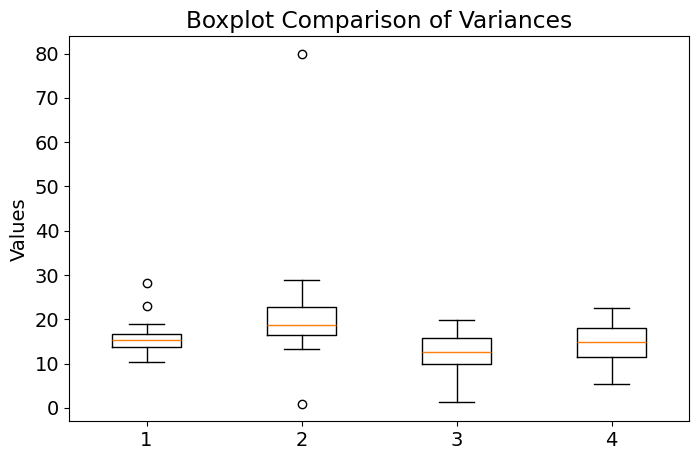

In [37]:
plt.figure(figsize=(8, 5));
plt.boxplot(x_i_j);
plt.title('Boxplot Comparison of Variances');
plt.ylabel('Values');

## 2. Monte Carlo Estimates for the Friedman Test (13 points total)

Consider a balanced block design in which $k=3$ treatments are applied to each of $b=5$ blocks.  The following Monte Carlo generates $10^4$ realizations of such a data set under a realization of the null hypothesis of no difference in the average response to the three treatments.

In [38]:
np.random.seed(20240408)
Nmonte = 10**4
mu_i = np.array([40.55, 46.82, 61.50, 48.12, 56.06])
b = len(mu_i)
k = 3
X0_Iij = mu_i[None,:,None] + stats.logistic.rvs(size=(Nmonte,b,k))

The following code constructs the Friedman test statistic (referred to in Conover as $T_1$)
$$
Q = \frac{12}{bk(k+1)} \sum_{j=1}^k \left(R_j - \frac{b(k+1)}{2}\right)^2
$$
for each of the $10^4$ Monte Carlo trials.

In [39]:
R0_Iij = stats.mstats.rankdata(X0_Iij,axis=-1)
R0_Ij = np.sum(R0_Iij,axis=1)
Q0_I = (12/(b*k*(k+1))) * np.sum((R0_Ij-0.5*b*(k+1))**2,axis=-1)

**(a)** \[3pts\]
List all of the possible values of $Q$ (you may assume that the Monte Carlo produces every possible value).

$$Q = \frac{12}{bk(k+1)}\sum_{j=1}^k \left({\color{royalblue}{R_j}}-\frac{b(k+1)}{2}\right)^2$$

In [40]:
Q_q = np.unique(Q0_I); Q_q

array([ 0. ,  0.4,  1.2,  1.6,  2.8,  3.6,  4.8,  5.2,  6.4,  7.6,  8.4,
       10. ])

$$\hbox{List of $Q$ values:} \boxed{\color{brown}{\{ 0. ,  0.4,  1.2,  1.6,  2.8,  3.6,  4.8,  5.2,  6.4,  7.6,  8.4, 10.\}}}$$

**(b)** \[6pts\]
For each $Q$ value, use the Monte Carlo to estimate the $p$-value that should be associated with an observed Friedman test statistic of that value.  Plot this along with the approximate $p$-value according to Friedman's original $\chi^2$ assumption, as well as the improved $F$-distribution approximation.

In [57]:
pval_q = np.mean(Q0_I[None,:]>=Q_q[:,None],axis=-1); pval_q

array([1.000e+00, 9.507e-01, 6.904e-01, 5.199e-01, 3.648e-01, 1.813e-01,
       1.229e-01, 9.470e-02, 3.610e-02, 2.200e-02, 9.500e-03, 8.000e-04])

In [58]:
pvalchisq_q = stats.chi2(df=k-1).sf(Q_q); pvalchisq_q

array([1.        , 0.81873075, 0.54881164, 0.44932896, 0.24659696,
       0.16529889, 0.09071795, 0.07427358, 0.0407622 , 0.02237077,
       0.01499558, 0.00673795])

In [59]:
pvalF_q = stats.f(k-1,(b-1)*(k-1)).sf((b-1)*Q_q/(b*(k-1)-Q_q)); pvalF_q

/tmp/ipykernel_2794622/1863294365.py:1: RuntimeWarning: divide by zero encountered in divide
  pvalF_q = stats.f(k-1,(b-1)*(k-1)).sf((b-1)*Q_q/(b*(k-1)-Q_q)); pvalF_q


array([1.0000000e+00, 8.4934656e-01, 5.9969536e-01, 4.9787136e-01,
       2.6873856e-01, 1.6777216e-01, 7.3116160e-02, 5.3084160e-02,
       1.6796160e-02, 3.3177600e-03, 6.5536000e-04, 0.0000000e+00])

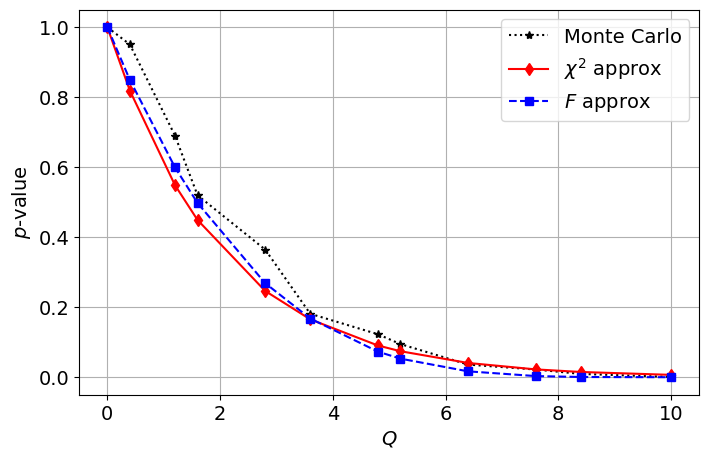

In [60]:
plt.plot(Q_q,pval_q,'k:*',label='Monte Carlo');
plt.plot(Q_q,pvalchisq_q,'r-d',label=r'$\chi^2$ approx');
plt.plot(Q_q,pvalF_q,'b--s',label=r'$F$ approx');
plt.xlabel(r'$Q$');
plt.ylabel('$p$-value');
plt.grid();
plt.legend();

**(c)** \[4pts\]
The following Monte Carlo generates $10^4$ realizations of the Friedman test statistic $Q$ under a realization of the alternative hypothesis that the three treatments have different average responses.

In [61]:
mu1_j = np.array([1.39, -0.05, -0.22])
X1_Iij = mu1_j[None,None,:] + X0_Iij
R1_Iij = stats.mstats.rankdata(X1_Iij,axis=-1)
R1_Ij = np.sum(R1_Iij,axis=1)
Q1_I = (12/(b*k*(k+1))) * np.sum((R1_Ij-0.5*b*(k+1))**2,axis=-1)

Use the ensembles `Q0_I` and `Q1_I` to estimate the significance $\alpha$ and power $\gamma$ of a series of tests with all possible thresholds on the Friedman test statistic $Q$, and plot the resulting ROC curve.  Include all the appropriate features of such a plot, in particular the aspect ratio and an $\alpha=\gamma$ reference line.

In [62]:
cq_Q = np.concatenate(([-1.],Q_q)); cq_Q

array([-1. ,  0. ,  0.4,  1.2,  1.6,  2.8,  3.6,  4.8,  5.2,  6.4,  7.6,
        8.4, 10. ])

In [63]:
alpha_Q = np.mean(Q0_I[None,:]>cq_Q[:,None],axis=-1); alpha_Q

array([1.000e+00, 9.507e-01, 6.904e-01, 5.199e-01, 3.648e-01, 1.813e-01,
       1.229e-01, 9.470e-02, 3.610e-02, 2.200e-02, 9.500e-03, 8.000e-04,
       0.000e+00])

In [64]:
gamma_Q = np.mean(Q1_I[None,:]>cq_Q[:,None],axis=-1); gamma_Q

array([1.    , 0.9821, 0.8631, 0.7513, 0.6394, 0.4278, 0.3391, 0.2738,
       0.1539, 0.1049, 0.0427, 0.0038, 0.    ])

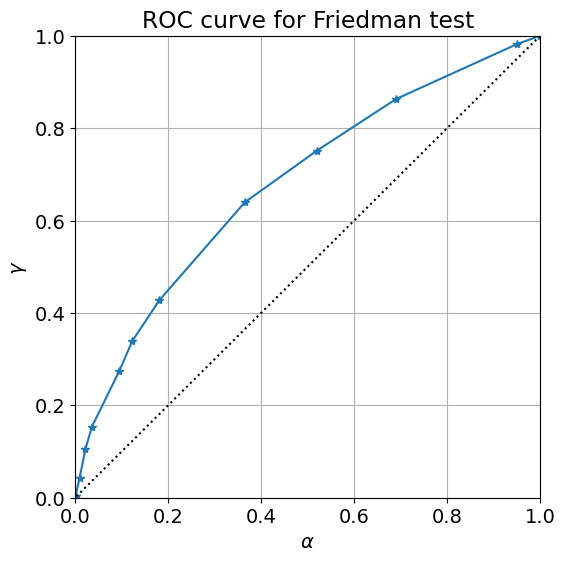

In [65]:
plt.figure(figsize=(6,6));
plt.plot(alpha_Q,gamma_Q,'-*');
plt.plot(alpha_Q,alpha_Q,'k:');
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$\gamma$');
plt.title('ROC curve for Friedman test');
plt.xlim(0,1);
plt.ylim(0,1);
plt.grid();

## 3. Goodness of Fit Test (14 points total)

A device is redundantly constructed with two critical components, and will continue to function until both components fail.  If each component's failure is governed by a Poisson process with rate $1/\beta$, the functional lifetime $\color{royalblue}{X}$ will be an Erlang random variable, i.e., a Gamma random variable with shape parameter $\alpha=2$ and scale parameter $\beta$.  (The fact that $\alpha$ is an integer is what makes this Gamma distribution an Erlang distribution.)  Its pdf will be
$$
f(x;\beta) =
\begin{cases}
0 & -\infty<x<0 \\
\frac{1}{\beta^2} x\,e^{-x/\beta} & 0<x<\infty
\end{cases}
$$
and its cdf will be
$$
F(x;\beta) =
\begin{cases}
0 & -\infty<x<0 \\
1 - \left(1+\frac{x}{\beta}\right) e^{-x/\beta} & 0<x<\infty
\end{cases}
$$
Suppose we collect the functional lifetimes, in days, of ten components, and find the following:

In [84]:
x_i = np.array([43.66, 72.03, 13.83, 18.66, 4.18, 11.65, 41.18, 56.60, 55.98, 58.38])

**(a)** \[4pts\]
We wish to evaluate the hypothesis that the device's lifetime is described by the model above, with a single component failure rate $1/\beta$ of one per ten days, using the Kolmogorov test.  Evaluate each of the following at the ten order statistics $\{x^{(i)}\}$ of the data above (each of your answers should be a list of ten numbers):

- The hypothesized CDF $F^*(x^{(i)})$ according to the model.

In [85]:
xordered_i = np.sort(x_i); xordered_i

array([ 4.18, 11.65, 13.83, 18.66, 41.18, 43.66, 55.98, 56.6 , 58.38,
       72.03])

In [86]:
beta = 10 # days
Fstar_i = stats.gamma(2,scale=beta).cdf(xordered_i)
Fstar_i

array([0.06644236, 0.32468744, 0.40228415, 0.55651117, 0.91669413,
       0.93184135, 0.97555265, 0.97680644, 0.98006951, 0.9938941 ])

- The empirical CDF $\hat{F}(x^{(i)};\mathbf{x})$ associated with the observed data $\mathbf{x}\equiv\{x_i\}$

In [87]:
n = len(x_i)
Fhatm_i = np.arange(1,n+1)/n
Fhatm_i

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- The empirical CDF $\hat{F}(x^{(i)}-\epsilon;\mathbf{x})$, evaluated at an argument infinitesimally less than the order statistic $x^{(i)}$.

In [88]:
Fhatp_i = np.arange(n)/n
Fhatp_i

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

**(b)** \[4pts\]
Use the results of part (a) to compute the two-sided Kolmogorov statistic $T$, and the associated $p$-value for the test of this model.  (Do not just use a function like `stats.kstest` or `stats.ks_1samp` to perform the test, although you may use it to check your answer.)

In [89]:
Tp=max(Fstar_i-Fhatp_i); Tm=max(Fhatm_i-Fstar_i); max(Tp, Tm)

0.516694129846515

In [90]:
2*stats.ksone(n).sf(Tp)

0.005250654212466165

$$T = \boxed{\color{brown}{0.5166}}$$

$$\hbox{$p$-value} = \boxed{\color{brown}{0.00525}}$$

**(c)** \[3pts\]
Now suppose we wish to test the hypothesis that the lifetime is described by the two-component Poisson model, but with an unknown failure rate.  Since the $\text{Gamma}(2,\beta)$ distribution has a mean of $2\beta$, a good estimate for the unknown scale parameter $\beta$ is $\hat\beta(\mathbf{x})=\overline{x}/2$, where $\overline{x}$ is the sample mean. Using the same data set as in part (a), evaluate, at the values of the ten order statistics $\{x^{(i)}\}$, the hypothesized cdf $F^*(x^{(i)};\hat\beta)$ using this best-fit value of the scale parameter $\beta$.

In [91]:
beta = 10 # days
Fstar_i = stats.gamma(2,scale=xordered_i.mean()/2).cdf(xordered_i)
Fstar_i

array([0.02132621, 0.12834118, 0.16817961, 0.26135601, 0.64287576,
       0.67405403, 0.79730991, 0.80225693, 0.81586738, 0.89513051])

**(d)** \[3pts\]
Use the results of part (c) to compute the two-sided Kolmogorov/Lilliefors-type statistic $T_2$ for the case where we estimate the parameter $\beta$ from the data.

In [92]:
Tp = max(Fstar_i-Fhatp_i); Tm = max(Fhatm_i-Fstar_i);

In [93]:
max(Tp, Tm)

0.24287576469169003

$$T_2 = \boxed{\color{brown}{0.2428}}$$

**(e)** \[extra credit\]
Construct a Monte Carlo to estimate the $p$-value associated with the result in part (d).

In [94]:
Fhatp_i = np.arange(n)/n
Fhatm_i = np.arange(1,n+1)/n

In [95]:
np.random.seed(20230327); Nmonte = 10**5; 
X_Ii = stats.gamma(2).rvs(size=(Nmonte,n)) 

betahat_I = 0.5*np.mean(X_Ii,axis=-1)
Xordered_Ii = np.sort(X_Ii,axis=-1)
xbar_I = np.mean(x_i,axis=-1)

Fstar_Ii = stats.gamma(2).cdf(Xordered_Ii/betahat_I[:,None])

Tp_I = np.max(Fstar_Ii-Fhatp_i[None,:],axis=-1); Tm_I = np.max(Fhatm_i[None,:]-Fstar_Ii,axis=-1)
print(np.mean(np.maximum(Tp_I,Tm_I)>=max(Tp,Tm)))

0.2424


$$\hbox{$p$-value} = \boxed{\color{brown}{0.2424}}$$